Dominant Frequency: 0.2344 Hz


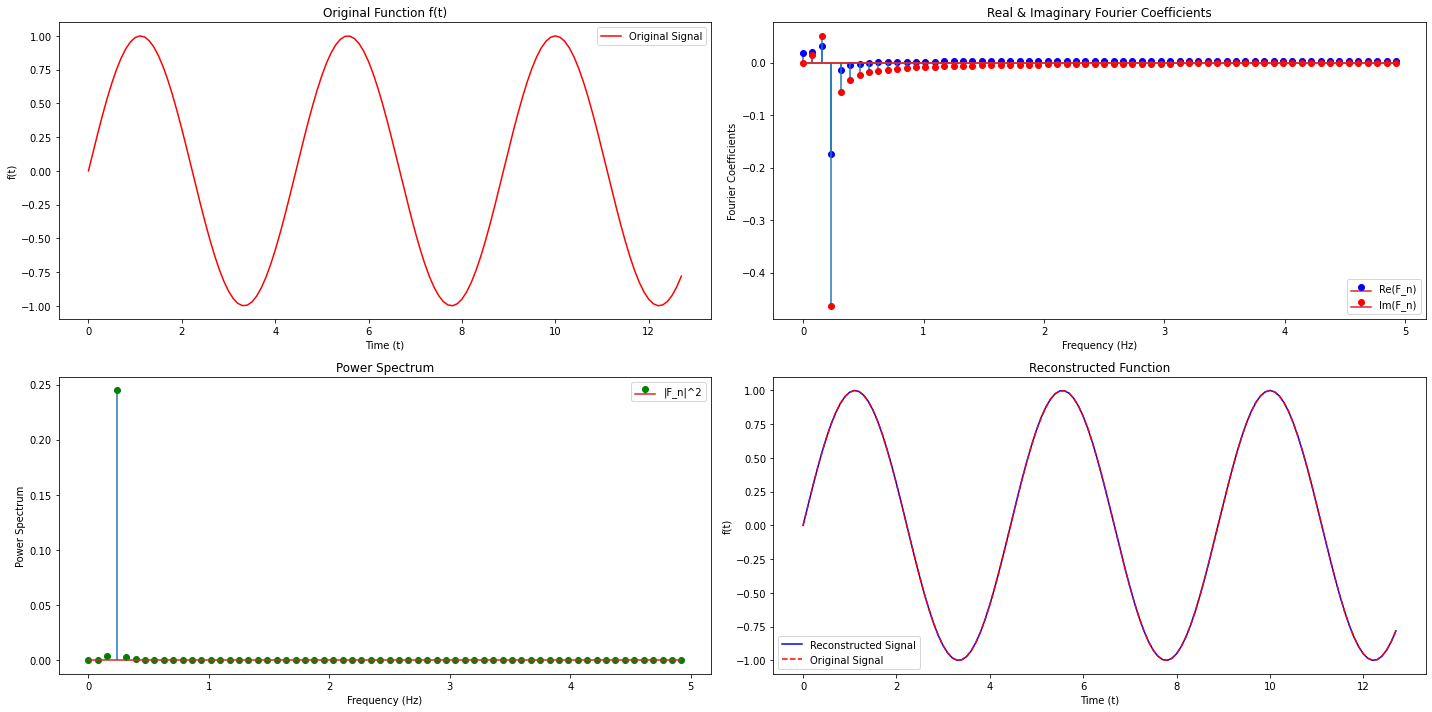

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
N = 128       # Number of samples
h = 0.1       # Sampling interval
T = N * h     # Total time
t = np.linspace(0, T, N, endpoint=False)  # Time samples
f_t = np.sin(0.45 * np.pi * t)  # Given function f(t)

# Compute Fourier coefficients manually
F_n = np.zeros(N, dtype=complex)
for n in range(N):
    for m in range(N):
        F_n[n] += f_t[m] * np.exp(-2j * np.pi * n * m / N)
    F_n[n] /= N  # Normalize

# Compute power spectrum
Power_Spectrum = np.abs(F_n) ** 2
freqs = np.fft.fftfreq(N, d=h)  # Frequency axis

# Identify the dominant frequency
dominant_index = np.argmax(Power_Spectrum)
dominant_frequency = np.abs(freqs[dominant_index])
print(f"Dominant Frequency: {dominant_frequency:.4f} Hz")

# Reconstruct the function using Fourier series
reconstructed_f = np.zeros(N, dtype=complex)
for n in range(N):
    reconstructed_f += F_n[n] * np.exp(2j * np.pi * n * t / T)

# Plot Original Function
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(t, f_t, 'r', label="Original Signal")
plt.xlabel("Time (t)")
plt.ylabel("f(t)")
plt.legend()
plt.title("Original Function f(t)")

# Plot Fourier Coefficients
plt.subplot(2, 2, 2)
plt.stem(freqs[:N//2], F_n.real[:N//2], markerfmt='bo', label="Re(F_n)")
plt.stem(freqs[:N//2], F_n.imag[:N//2], markerfmt='ro', label="Im(F_n)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Fourier Coefficients")
plt.legend()
plt.title("Real & Imaginary Fourier Coefficients")

# Plot Power Spectrum
plt.subplot(2, 2, 3)
plt.stem(freqs[:N//2], Power_Spectrum[:N//2], markerfmt='go', label="|F_n|^2")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectrum")
plt.legend()
plt.title("Power Spectrum")

# Plot Reconstructed Function
plt.subplot(2, 2, 4)
plt.plot(t, reconstructed_f.real, 'b', label="Reconstructed Signal")
plt.plot(t, f_t, 'r--', label="Original Signal")
plt.xlabel("Time (t)")
plt.ylabel("f(t)")
plt.legend()
plt.title("Reconstructed Function")

plt.tight_layout()
plt.show()
